# **Data cleaning**

## Objectives

* Clean the .csv raw data from Kaggle

## Inputs

* This file uses `CarPrice_Assignment.csv` data located in the `data/raw`.

## Outputs

* The file will save the cleaned data into `data/cleaned` folder.


## Load the libraries and the data
In this section relevant data analysis libraries and the raw data will be loaded.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

The data will be loaded as the variable `df`:

In [2]:
df = pd.read_csv('../data/raw/CarPrice_Assignment.csv')
print(df.shape)
df.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Check for null entries

In [3]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

All the data is filled, there are no null values.

### Look into the categorical data

Here I will look at different categorical variables in order to understand them better and to decide which variables should be combined in the data cleaning process

In [4]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

We know that `CarName` is just the name of the car model so it can be ignored for the purpose of this analysis. For other categories we will however look for unique entries in the data:

In [5]:
print(f"fueltype: {df['fueltype'].unique()}")
print(f"aspiration: {df['aspiration'].unique()}")
print(f"doornumber: {df['doornumber'].unique()}")
print(f"carbody: {df['carbody'].unique()}")
print(f"drivewheel: {df['drivewheel'].unique()}")
print(f"enginelocation: {df['enginelocation'].unique()}")
print(f"enginetype: {df['enginetype'].unique()}")
print(f"cylindernumber: {df['cylindernumber'].unique()}")
print(f"fuelsystem: {df['fuelsystem'].unique()}")

fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


From this we can deduce two obvious things: first we should convert verbose numerical values of the `doornumber` and `cylindernumber` into numbers for the ease of analysis. We might also look at combining some `enginetype` and `fuelsystem` variables, especially if some uncommon ones have a very low value count, since there are more than 5 categories there.

## Data cleaning

### Extract the brand name
If you look into how the `CarName` data is structured, you will notice that it is in the format `car-brand details`. Therefore in order to extract the brand name you need to extract the first word in the string before the space. In this line of code I will also check the unique brands what were extracted from the string. 

In [6]:
df['brand'] = df['CarName'].str.split(' ', n=1).str[0]
print(df['brand'].unique())
df.head(10)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


We can see here in the list many misspelled values (e.g. `maxda` instead of `mazda`) or values that have alternative name (e.g. `vw` instead of `volkswagen`). To fix this I will create a dictionary that corrects and standardizes the brand names and replace the relevant values in the table.

In [7]:
brand_dict = {
   'maxda': 'mazda',
   'Nissan': 'nissan', 
   'porcshce': 'porsche',
   'toyouta': 'toyota',
   'vokswagen': 'volkswagen',
   'vw': 'volkswagen'
}

df['brand'].replace(to_replace=brand_dict, inplace=True)
df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Now we have a clean `brand` column.

### Converting `doornumber` and `cylindernumber` to numerical values
If we look at these two categories we can clearly see that they represent just verbose numbers:

In [8]:
print(f"doornumber: {df['doornumber'].unique()}")
print(f"cylindernumber: {df['cylindernumber'].unique()}")

doornumber: ['two' 'four']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


To convert them to numbers we just create a dictionary that maps number words to numbers and then replace the values:

In [9]:
number_dict = {
    'four': 4, 'six': 6, 'five': 5,  'three': 3, 'twelve': 12, 'two': 2, 'eight': 8
}

df['cylindernumber'].replace(to_replace=number_dict, inplace=True)
df['doornumber'].replace(to_replace=number_dict, inplace=True)

Next we check whether our transformation worked:

In [10]:
print(f"cylindernumber: {df['cylindernumber'].unique()}, datatype: {df['cylindernumber'].dtype}")
print(f"doornumber: {df['doornumber'].unique()}, datatype: {df['doornumber'].dtype}")

cylindernumber: [ 4  6  5  3 12  2  8], datatype: int64
doornumber: [2 4], datatype: int64


### Combining less common variables into a common classification
There are two categorical variables, that have more than 5 different categories: `enginetype` and `fuelsystem`. We might take a look at their distribution to see whether it's a good idea to combine them:

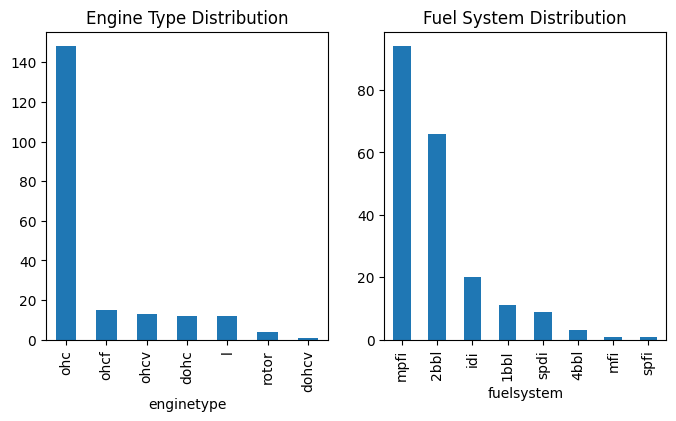

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

df['enginetype'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Engine Type Distribution')
df['fuelsystem'].value_counts().plot(kind='bar', ax=ax[1]) 
ax[1].set_title('Fuel System Distribution')
plt.show()


Here we can clearly see two patterns: Nearly all cars have a `ohc` (Overhead Cam) engines, and most fuelsystem fall into eigher `mpfi` or `2bbl` category.

#### Combining `enginetype`
We will deal with the engine types in the following way:
1. Group all Overhead Cam engines. These are all variations of the same fundamental Overhead Camshaft design. They can be combined into a single, new category called overhead cam (`ohc`).
- `ohc`
- `ohcf`
- `ohcv`

2. Group all Dual Overhead Cam engines. As mentioned above, dohcv is a more detailed way of saying dohc. These two should be combined into a single category called dual overhead cam (`dohc`).
- `dohc`
- `dohcv`

3. Keep Unique Engine Types Separate
- `l` (L-head)
- `rotor` (Rotary)

These are distinct engine designs and should be kept as their own separate categories to preserve the unique characteristics of the data. This approach will reduce seven categories down to just **four**.


In [12]:
enginetype_dict = {'ohcf': 'ohc', 'ohcv': 'ohc', 'dohcv': 'dohc'}
df['enginetype'].replace(to_replace=enginetype_dict, inplace=True)
df['enginetype'].value_counts()

enginetype
ohc      176
dohc      13
l         12
rotor      4
Name: count, dtype: int64

This is still not ideal since there are very few engines other than `ohc`, but it's still better than it was before, and I don't want to make the data meaningless by combining too much.

#### Combining `fuelsystem`
We will deal with the fuel systems in the following way:
1. Group All Fuel Injection Systems into one category. We can combine all the systems that use injectors to deliver fuel. This includes all the modern and older injection methods. They can be combined into a new, single category called `injection`:
- `mpfi` (Multi-Point Fuel Injection)
- `spdi` (Single-Point Diesel Injection)
- `spfi` (Single-Point Fuel Injection)
- `idi` (Indirect Diesel Injection)
- `mfi` (Mechanical Fuel Injection)
2. Group All Carburetor Systems into one category. All the systems with the bbl (barrel) designation are different types of carburetors. These are a different class of fuel delivery system. They can be combined into a single category called `carburetor`:
- `2bbl`
- `1bbl`
- `4bbl`

This will simplify the data from eight categories down to just **two**.


In [13]:
fuelsystem_dict = {
    'mpfi': 'injection', 'spdi': 'injection',
    'spfi': 'injection', 'idi': 'injection',
    'mfi': 'injection', '2bbl': 'carburetor', 
    '1bbl': 'carburetor', '4bbl': 'carburetor'
}
df['fuelsystem'].replace(to_replace=fuelsystem_dict, inplace=True)
df['fuelsystem'].value_counts()

fuelsystem
injection     125
carburetor     80
Name: count, dtype: int64

This gave us two simple categories that are ideal for further analysis.

### Other problems with the data
As you can probably see from the DataFrame head above, there are models with same names (e.g. `audi 100 ls` and two entries for `audi 100ls`). However they have different properties and it's impossible to know what are the differences between them without more context. I will therefore assume they are different models (these might be for example different trims or years: One might be a base model, and the other a more expensive luxury or performance-focused trim, or they might be the same model released in different year). Therefore I will keep these duplicates.

I also do not see any reason for cleaning misspellings in the CarName string since it won't be analyzed and it would take a long time to do.

## Save the cleaned data
The data will be saved in the `data/cleaned` folder. Before saving it let's make `car_ID` the index of our DataFrame to avoid the duplicate index:

In [14]:
df.set_index('car_ID', inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,injection,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,injection,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,injection,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,injection,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,injection,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Next I will save it to a `.csv` file:

In [15]:
df.to_csv("../data/cleaned/CarPrice_cleaned.csv")